In [1]:
import pandas as pd
import numpy as np
import os

In [4]:
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("temp.csv")

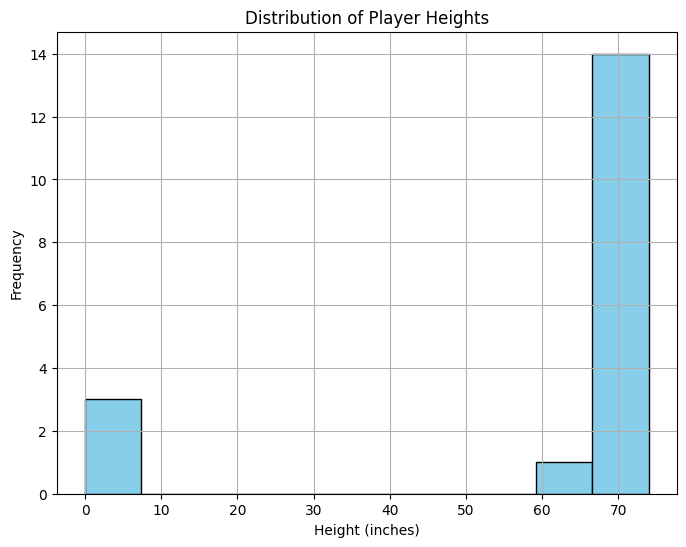

In [5]:
# Histogram of Player Heights
plt.figure(figsize=(8, 6))
plt.hist(data['Ht'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Player Heights')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

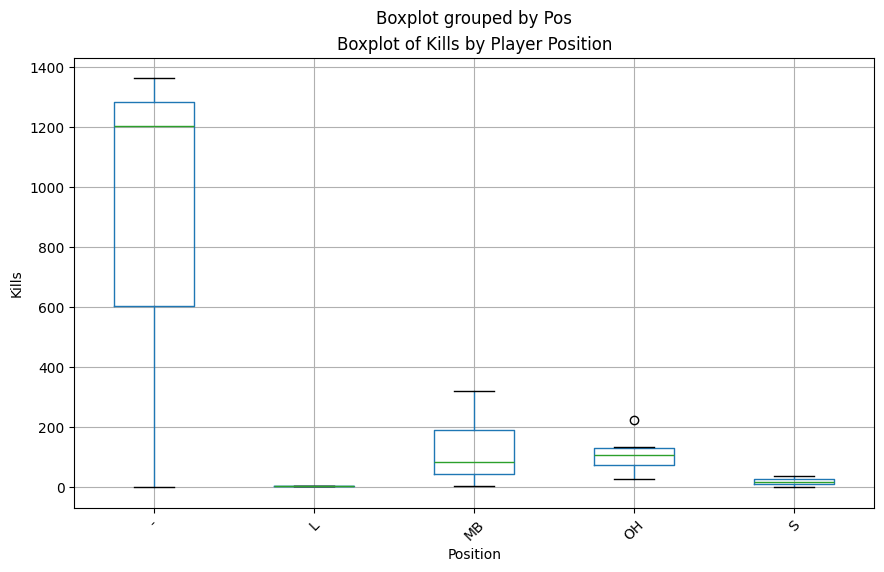

In [6]:

# Boxplot of Player Positions vs. Kills
plt.figure(figsize=(10, 6))
data.boxplot(column='Kills', by='Pos', figsize=(10, 6))
plt.title('Boxplot of Kills by Player Position')
plt.xlabel('Position')
plt.ylabel('Kills')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

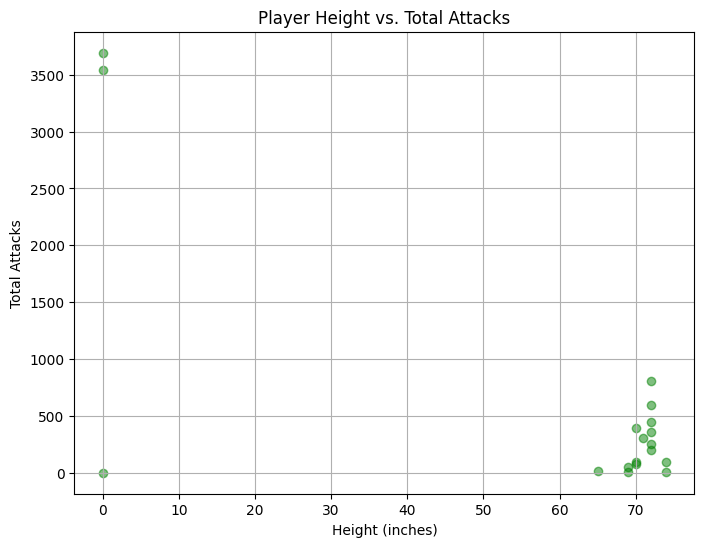

In [7]:
# Scatterplot of Player Height vs. Total Attacks
plt.figure(figsize=(8, 6))
plt.scatter(data['Ht'], data['Total Attacks'], color='green', alpha=0.5)
plt.title('Player Height vs. Total Attacks')
plt.xlabel('Height (inches)')
plt.ylabel('Total Attacks')
plt.grid(True)
plt.show()

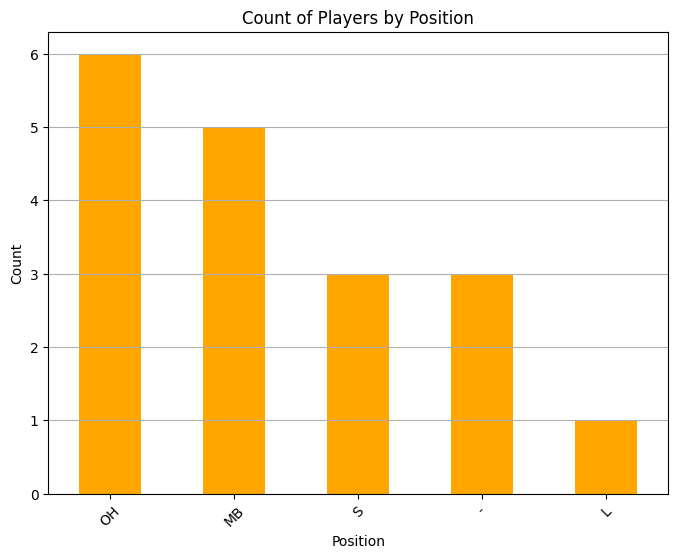

In [8]:
# Bar Chart of Player Positions
plt.figure(figsize=(8, 6))
data['Pos'].value_counts().plot(kind='bar', color='orange')
plt.title('Count of Players by Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

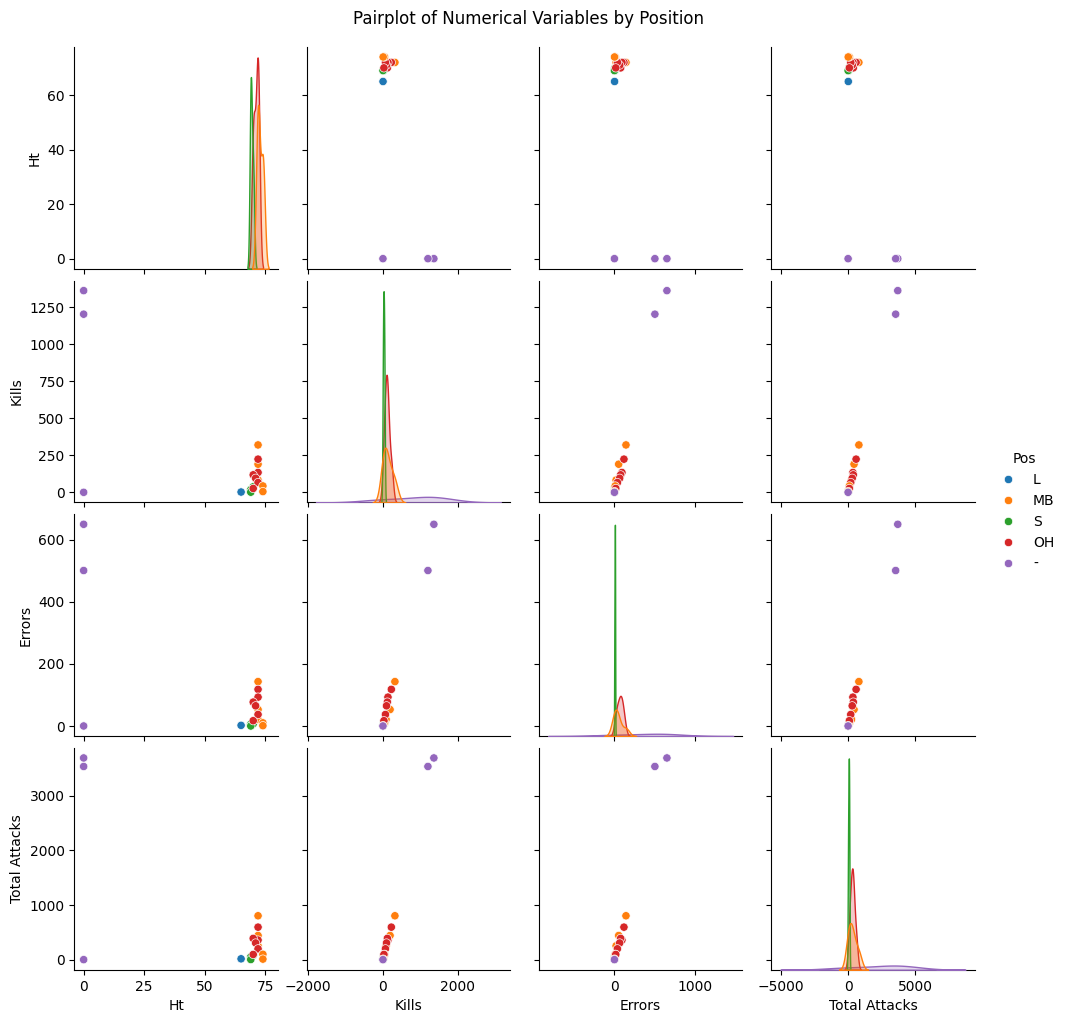

In [9]:
# Pairplot
import seaborn as sns
sns.pairplot(data, vars=['Ht', 'Kills', 'Errors', 'Total Attacks'], hue='Pos', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables by Position', y=1.02)
plt.show()


In [2]:

directory_arr = ['raw/2016/team_stats/', 'raw/2017/team_stats/', 'raw/2018/team_stats/', 'raw/2019/team_stats/']

dfs = []

cat_cols = ['Yr', 'Pos']

for directory in directory_arr:
    team_dfs = {}
    for entry in os.scandir(directory):
        if entry.is_file() and entry.name.endswith('.csv'):
            key = entry.name.replace('.csv', '')
            formatted_key = f'df_{key.replace(" ", "").replace(".", "").replace("-", "")}'
            
            team_dfs[formatted_key] = pd.read_csv(entry.path)

    def convert_height(height):
        try:
            feet, inches = height.split('-')
            return int(feet) * 12 + int(inches)
        except ValueError:
            return None

    for key in team_dfs:
        team_dfs[key]['Ht'] = team_dfs[key]['Ht'].apply(convert_height)
        team_dfs[key] = team_dfs[key ].drop(['Jersey', 'GP', 'GS', 'Trpl Dbl'], axis=1)
        team_dfs[key] = team_dfs[key].fillna(0)
        team_dfs[key][cat_cols] = team_dfs[key][cat_cols].astype('category')

    dfs.append(team_dfs)

/var/folders/mm/k5dyq85x0v51mj1pdpwr71440000gp/T/ipykernel_4471/2417048201.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  team_dfs[key] = team_dfs[key].fillna(0)
